In [1]:
#pip install biopython

  Obtaining dependency information for biopython from https://files.pythonhosted.org/packages/2a/3c/10f22f3599acdf12b2a7a687589e3722b521147fe0e7846bd11f294eaf90/biopython-1.83-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.7 MB 1.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.7 MB 3.1 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.7 MB 3.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.7 MB 3.6 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.7 MB 3.7 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 3.9 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 3.9 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 3.9 MB/s eta 0:00:01
   --------------- ------------------------ 1

In [11]:
#comando para descargar los archivos FASTA introduciendo únicamente la url
#pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=241fcbfb51aa35ba1e2f8babd09b178f61a9bb5623c2f77cfdd30d0b31cdb460
  Stored in directory: c:\users\gabriel\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [1]:
import Bio
help(Bio)

Help on package Bio:

NAME
    Bio - Collection of modules for dealing with biological data in Python.

DESCRIPTION
    The Biopython Project is an international association of developers
    of freely available Python tools for computational molecular biology.
    
    https://biopython.org

PACKAGE CONTENTS
    Affy (package)
    Align (package)
    AlignIO (package)
    Alphabet (package)
    Application (package)
    Blast (package)
    CAPS (package)
    Cluster (package)
    Compass (package)
    Data (package)
    Emboss (package)
    Entrez (package)
    ExPASy (package)
    File
    GenBank (package)
    Geo (package)
    Graphics (package)
    HMM (package)
    KEGG (package)
    LogisticRegression
    MarkovModel
    MaxEntropy
    Medline (package)
    NMR (package)
    NaiveBayes
    Nexus (package)
    PDB (package)
    Pathway (package)
    Phylo (package)
    PopGen (package)
    Restriction (package)
    SCOP (package)
    SVDSuperimposer (package)
    SearchIO (packag

## Lectura de archivos FASTA

In [2]:
from Bio import SeqIO 

In [3]:
import wget
help(wget)

Help on module wget:

NAME
    wget - Download utility as an easy way to get file from the net

DESCRIPTION
      python -m wget <URL>
      python wget.py <URL>
    
    Downloads: http://pypi.python.org/pypi/wget/
    Development: http://bitbucket.org/techtonik/python-wget/
    
    wget.py is not option compatible with Unix wget utility,
    to make command line interface intuitive for new people.
    
    Public domain by anatoly techtonik <techtonik@gmail.com>
    Also available under the terms of MIT license
    Copyright (c) 2010-2015 anatoly techtonik

FUNCTIONS
    bar_adaptive(current, total, width=80)
        Return progress bar string for given values in one of three
        styles depending on available width:
        
            [..  ] downloaded / total
            downloaded / total
            [.. ]
        
        if total value is unknown or <= 0, show bytes counter using two
        adaptive styles:
        
            %s / unknown
            %s
        
       

La función wget se utiliza para descargar archivos desde la web en sistemas Unix/Linux a través de la línea de comandos. Si estás trabajando en Python y necesitas descargar archivos desde la web, puedes utilizar el módulo urllib.request que viene con Python de forma predeterminada.

Aquí tienes un ejemplo básico de cómo descargar un archivo utilizando urllib.request:

In [4]:
import urllib.request

url = 'https://example.com/archivo.txt'
destino_local = 'archivo_local.txt'

urllib.request.urlretrieve(url, destino_local)

HTTPError: HTTP Error 404: Not Found

In [10]:
help(SeqIO.parse)

Help on function parse in module Bio.SeqIO:

parse(handle, format, alphabet=None)
    Turn a sequence file into an iterator returning SeqRecords.
    
    Arguments:
     - handle   - handle to the file, or the filename as a string
       (note older versions of Biopython only took a handle).
     - format   - lower case string describing the file format.
     - alphabet - no longer used, should be None.
    
    Typical usage, opening a file to read in, and looping over the record(s):
    
    >>> from Bio import SeqIO
    >>> filename = "Fasta/sweetpea.nu"
    >>> for record in SeqIO.parse(filename, "fasta"):
    ...    print("ID %s" % record.id)
    ...    print("Sequence length %i" % len(record))
    ID gi|3176602|gb|U78617.1|LOU78617
    Sequence length 309
    
    For lazy-loading file formats such as twobit, for which the file contents
    is read on demand only, ensure that the file remains open while extracting
    sequence data.
    
    If you have a string 'data' containin

En caso de trabajar con datos de grandes dimensiones:

1-Debemos descagar los datos (utilizar urllib.request)

2- Ya con ello, deberíamos descomprimirlos para poder trabajar con ellos (utilizar paquete gzip)


**SimpleFastaParser vs SeqIO.parse()**
En caso de que el tiempo de ejecución sea importante( o manejando grandes datos), se deberá utilizar antes el método de SimpleFastaParser 
(from Bio.SeqIO.FastaIO import SimpleFastaParser) que SeqIO.parse (from Bio import SeqIO), ya que este primero 
tarda un menor tiempo en leer los archivos pasados

## Calculo del contenido de GC

El contenido en G+C del DNA es la proporción de citosinas y guaninas respecto al total de nucleótidos en el genoma. Es un carácter ampliamente utilizado en las descripciones taxonómicas de microorganismos procariotas.

El contenido GC se utiliza a veces para clasificar organismos en taxonomía. Por ejemplo, las Actinobacteria se caracterizan por ser “bacterias de GC alto”. En Streptomyces coelicolor el GC es del 72%, en la levadura Saccharomyces cerevisiae del 38%, mientras que en el organismo modelo Arabidopsis thaliana es del 36%.

In [5]:
from Bio import SeqIO

max_sequence_id = None
max_gc_content = 0
for seq_record in SeqIO.parse("gc_content.fasta","fasta"):
    sequence = str(seq_record.seq) #hay que convertir la secuencia a string
    sequence_id = seq_record.id
    gc_content = (sequence.count("C")+ sequence.count("G")) / len(sequence) * 100
    if gc_content > max_gc_content:
        max_sequence_id=sequence_id
        max_gc_content=gc_content
        
print(max_sequence_id)
print(max_gc_content)

FileNotFoundError: [Errno 2] No such file or directory: 'gc_content.fasta'

## Objeto SEQ: DNA->RNA->PROTEINA

Es el dogma central de la biología molecular: ADN->Transcripción->ARN->Traducción->Proteína.

LAS OPERACIONES DE TRANSCRIPCIÓN, TRADUCCIÓN Y REPLICACIÓN ESTÁN DISPONIBLES EN EL PAQUETE DE BIOPYTHON.

**objeto seq**

El objeto seq en biopython es la cadena de caracteres de python con métodos biológicos

OJO: porque permite más letras que solo ATCG

In [6]:
from Bio.Seq import Seq
secuencia= Seq("ACTAGTCGACTGAT")
print(secuencia)
print(type(secuencia))

ACTAGTCGACTGAT
<class 'Bio.Seq.Seq'>


In [10]:
help(Seq)

Help on class Seq in module Bio.Seq:

class Seq(_SeqAbstractBaseClass)
 |  Seq(data: Union[str, bytes, bytearray, Bio.Seq._SeqAbstractBaseClass, Bio.Seq.SequenceDataAbstractBaseClass, dict, NoneType], length: Union[int, NoneType] = None)
 |  
 |  Read-only sequence object (essentially a string with biological methods).
 |  
 |  Like normal python strings, our basic sequence object is immutable.
 |  This prevents you from doing my_seq[5] = "A" for example, but does allow
 |  Seq objects to be used as dictionary keys.
 |  
 |  The Seq object provides a number of string like methods (such as count,
 |  find, split and strip).
 |  
 |  The Seq object also provides some biological methods, such as complement,
 |  reverse_complement, transcribe, back_transcribe and translate (which are
 |  not applicable to protein sequences).
 |  
 |  Method resolution order:
 |      Seq
 |      _SeqAbstractBaseClass
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __hash__(se

**algunos métodos relacionados**

In [7]:
#count()
#método similar al presentado por las cadenas de carácteres
secuencia= Seq("AAAA")
print(secuencia.count("AA"))

2


In [8]:
help(Seq.count_overlap)

Help on function count_overlap in module Bio.Seq:

count_overlap(self, sub, start=None, end=None)
    Return an overlapping count.
    
    Returns an integer, the number of occurrences of substring
    argument sub in the (sub)sequence given by [start:end].
    Optional arguments start and end are interpreted as in slice
    notation.
    
    Arguments:
     - sub - a string or another Seq object to look for
     - start - optional integer, slice start
     - end - optional integer, slice end
    
    e.g.
    
    >>> from Bio.Seq import Seq
    >>> print(Seq("AAAA").count_overlap("AA"))
    3
    >>> print(Seq("ATATATATA").count_overlap("ATA"))
    4
    >>> print(Seq("ATATATATA").count_overlap("ATA", 3, -1))
    1
    
    For a non-overlapping search, use the ``count`` method:
    
    >>> print(Seq("AAAA").count("AA"))
    2
    
    Where substrings do not overlap, ``count_overlap`` behaves the same as
    the ``count`` method:
    
    >>> from Bio.Seq import Seq
    >>> my_se

In [9]:
secuencia.count_overlap("AA")
#que sería como: AAAA, y de ahí, buscar todos los AA posibles, AA-AA,A-AA-A Y AA-AA

3

In [34]:
help(Seq)

Help on class Seq in module Bio.Seq:

class Seq(_SeqAbstractBaseClass)
 |  Seq(data: Union[str, bytes, bytearray, Bio.Seq._SeqAbstractBaseClass, Bio.Seq.SequenceDataAbstractBaseClass, dict, NoneType], length: Union[int, NoneType] = None)
 |  
 |  Read-only sequence object (essentially a string with biological methods).
 |  
 |  Like normal python strings, our basic sequence object is immutable.
 |  This prevents you from doing my_seq[5] = "A" for example, but does allow
 |  Seq objects to be used as dictionary keys.
 |  
 |  The Seq object provides a number of string like methods (such as count,
 |  find, split and strip).
 |  
 |  The Seq object also provides some biological methods, such as complement,
 |  reverse_complement, transcribe, back_transcribe and translate (which are
 |  not applicable to protein sequences).
 |  
 |  Method resolution order:
 |      Seq
 |      _SeqAbstractBaseClass
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __hash__(se

In [10]:
#Para calcular el contenido de GC (en esta versión parece no haber el método GC)
from Bio.SeqUtils import gc_fraction
secuencia = Seq("GACATATATAGCTAGCAAAGCTA")
gc_fraction(secuencia)*100

34.78260869565217

**Transcripción**

recordemos que es el paso de DNA a RNA, si se trascribe la cadena 3'->5' entonces obtendremos la cadena 5'->3' como ARN

In [11]:
dna_codificante= Seq("ATGATCGATCAACTTCGATCGATTCGTAACTGTTGTGTTTAGCTA")
dna_plantilla = dna_codificante.reverse_complement()
dna_plantilla #generalmente la secuencia de nucleótidos suele ser leída en dirección 5' a 3' 
# mientras que la cadena molde es mostrada la reversa, aunq en sentido 5' a 3' en vez de como suele verse

Seq('TAGCTAAACACAACAGTTACGAATCGATCGAAGTTGATCGATCAT')

In [12]:
#transcripción
# al final solo cambiamos las T por U, al transcribir la molde obtenemos la cadena de RNA de dna_codificante
rna_mensajero=dna_codificante.transcribe()
rna_mensajero

Seq('AUGAUCGAUCAACUUCGAUCGAUUCGUAACUGUUGUGUUUAGCUA')

In [13]:
# el objeto aeq tambíen incluye un método de retro-transcripción para que, partiendo de mRNA obtengamos la cadena 
#correspondiente de DNA
dna_codificante = rna_mensajero.back_transcribe()
dna_codificante

Seq('ATGATCGATCAACTTCGATCGATTCGTAACTGTTGTGTTTAGCTA')

**Traducción**

In [14]:
#primera posibilidad, a partir del mRNA
rna_mensajero.translate()
#para este caso * == codón de STOP

Seq('MIDQLRSIRNCCV*L')

In [15]:
#segunda posibilidad, directamente con el DNA codificante (OJO= CODIFICANTE)
#aquí se mantiene que * == codón de STOP
dna_codificante.translate()

Seq('MIDQLRSIRNCCV*L')

## FASTQ y comprobación de la calidad de las lecturas


Fastq: formato para secuencias de secuenciación de siguiente generación
Secuencia fasta + detalles calidad de la información (la Q es de Quality).

Línea 1: Encabezado (Header): comienza con @. Sigue el identificador (identifier). Si son datos crudos contiene info del secuenciador que identifica a esta secuencia y el read pair (/1 o /2), si son datos ya procesados en SRA contiene una descripción de la secuencia.

Línea 2: la secuencia.

Línea 3: Comienza con +. Puede ser sólo el símbolo + o repetir la info del Header.

Línea 4: Información de la calidad de secuenciación de cada base. Cada letra o símbolo representa a una base de la secuencia codificado en formato ASCII.

La info de calidad se codifica en ASCII porque esto permite en 1 sólo caracter codificar un valor de calidad. Por lo tanto la línea 2 y la 4 tienen el mismo número de caracteres.


**Descarga de archivos FASTQ**

In [16]:
!rm -f SRR003265.filt.fastq.gz 2>/dev/null
!wget:-nd https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

El sistema no puede encontrar la ruta especificada.
El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos.


In [61]:
import os
import urllib.request

# Eliminar el archivo si existe
archivo_local = 'SRR003265.filt.fastq.gz'
if os.path.exists(archivo_local):
    os.remove(archivo_local)

# Descargar el archivo desde la URL
url = 'https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz'
urllib.request.urlretrieve(url, archivo_local)


('SRR003265.filt.fastq.gz', <http.client.HTTPMessage at 0x230471643d0>)


En este código:

1. Se utiliza `os.path.exists()` para verificar si el archivo local (`SRR003265.filt.fastq.gz`) ya existe. Si existe, se elimina con `os.remove()`.

2. Se utiliza `urllib.request.urlretrieve()` para descargar el archivo desde la URL especificada y guardarlo localmente con el nombre `SRR003265.filt.fastq.gz`.


**Lectura de archivos FASTQ**

In [17]:
from collections import defaultdict #Se utiliza para crear un diccionario que asigna automáticamente un valor predeterminado a una nueva clave si aún no existe.
import gzip #Se utiliza para leer archivos comprimidos en formato gzip.

%matplotlib inline
import seaborn as sns #Se utilizan para crear gráficos y visualizaciones.
import matplotlib.pyplot as plt

from Bio import SeqIO #Se utiliza para leer y manipular datos de secuencias biológicas.
recs = SeqIO.parse(gzip.open ('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations) # quality scores of our reads, per letter

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


**OJO**

-rec es un objeto de tipo SeqRecord que contiene información sobre una secuencia biológica individual en formato fastq.

-rec.id: Obtiene el identificador único de la secuencia.


-rec.description: Obtiene la descripción de la secuencia.


-rec.seq: Obtiene la secuencia de letras que representa la secuencia biológica.


-rec.letter_annotations: Contiene información adicional asociada a las letras de la secuencia, como puntajes de calidad en el caso de datos de secuenciación.

A continuación mostramos una imagen con la tabla de calidad de Phe:

In [19]:
from PIL import Image

# Ruta de la imagen
ruta_imagen = 'C:\\Users\\Gabriel\\Desktop\\TFG\\Imágenes\\notebooks\\tablaphecalidad.png'

# Abrir la imagen
imagen = Image.open(ruta_imagen)

# Mostrar la imagen
imagen.show()


**CUIDADO**

Nunca debemos hacer list(recs), debido a que sobrecarga la memoria, mostrando tooodas las secuencias presentadas en nuestro archivo

**Distribución de los nucleotidos de las lecturas**

In [27]:
#Con el siguiente código realizo un recuento de el número de bases presentes en todas las lecturas(
#recordemos que cada read o lectura es una secuencia)
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
count = defaultdict(int)
for rec in recs:
    for letter in rec.seq: 
        count [letter] += 1
tot = sum(count.values())
for letter, count in count.items():
    print('%s: %.2f %d'% (letter, 100. * count / tot, count))

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


defaultdict(<class 'int'>, {})


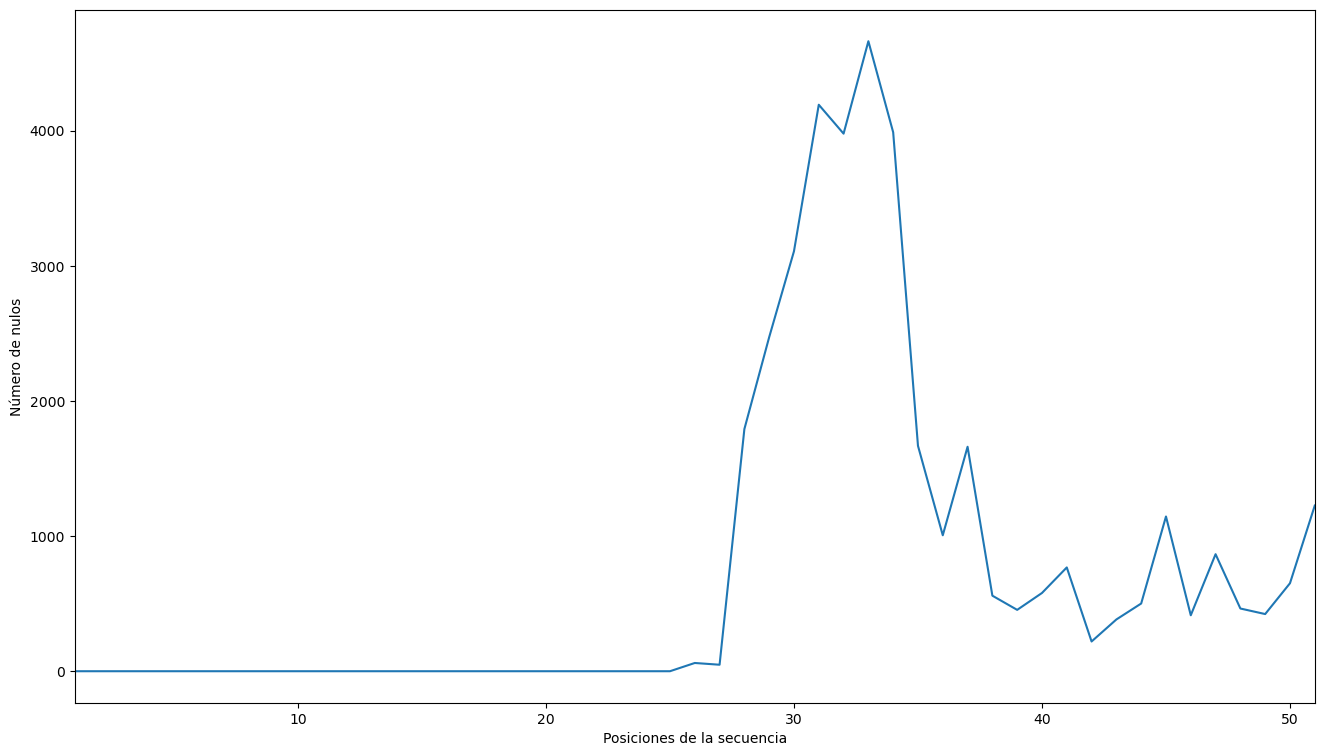

In [32]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
contador_N = defaultdict(int)
print(contador_N)
for rec in recs:
    for i,letter in enumerate(rec.seq): 
        pos = i+1
        if letter == 'N':#es decir, si es deconocida
            contador_N[pos] += 1
longitud_secuencia= max(contador_N.keys())
posiciones = range(1, longitud_secuencia + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(posiciones, [contador_N[x] for x in posiciones])
ax.set_xlim(1, longitud_secuencia)
ax.set_xlabel('Posiciones de la secuencia')
ax.set_ylabel('Número de nulos')
pass

Para estos dos siguientes casos ignoramos las 25 primeras posiciones de cada secuencia, ya que son de alta calidad y no presentan variación alguna:

In [34]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
contador_calidad = defaultdict(int)
for rec in recs:
    for i, calidad in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        contador_calidad[calidad] += 1
tot = sum(contador_calidad.values())
for calidad, contador in contador_calidad.items():
    print('%d: %.2f %d'% (calidad, 100. * contador / tot, contador))
print(contador_calidad)

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229
defaultdict(<class 'int'>, {40: 3007221, 16: 270431, 32: 136763, 35: 120704, 31: 142464, 39: 102568, 22: 209905, 24: 193259, 20: 228923, 28: 162226, 12: 309918, 10: 654154, 13: 301033, 26: 176263, 23: 201164, 37: 111179, 34: 125624, 21: 219602, 30: 149449, 33: 131291, 25: 184846, 17: 259779, 38: 106290, 4: 630923, 36: 115701, 18: 248982, 11: 318303, 1

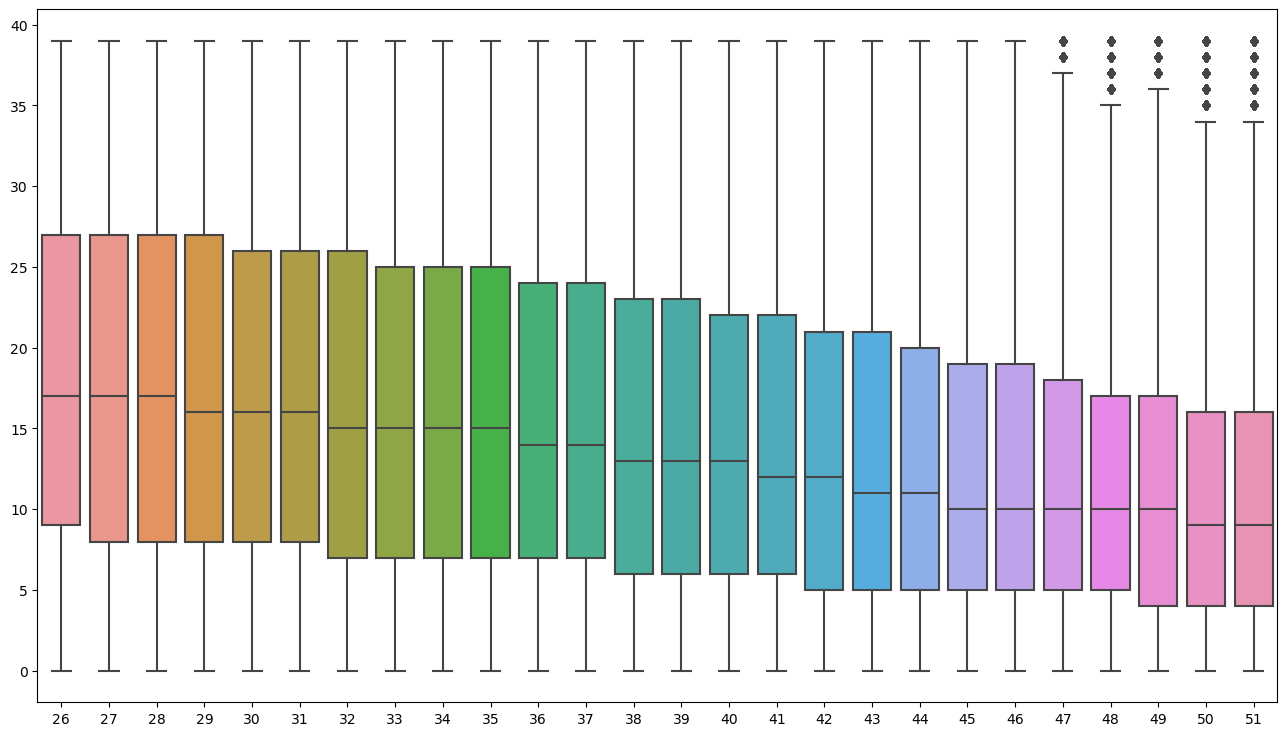

In [36]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
posicion_calidad = defaultdict(list)
for rec in recs:
    for i, calidad in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or calidad == 40:
            continue
        posicion= i + 1
        posicion_calidad[posicion].append(calidad)
vps = []
poses = list(posicion_calidad.keys())
poses.sort()
for pos in poses:
    vps.append(posicion_calidad[pos])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps,ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(posicion_calidad.keys()) + 1)])
pass

## NCBI: Accesibilidad con entrez

OJO: Reglas a cumplir:


        - especificar una dirección de correo con la solicitud
        
        - evitar alto número de solicitudes(100 o más) durante los tiempos de mayor concurrencia(de 9 de la mañana a 5 de la tarde respecto la zona horaria del este americano, entre las 3 de la mañana y las 11 de la mañana)
        
        - no publicar más de tres solicitudes por segundo(Biopython lo cumple automáticamente)
        

In [1]:
from Bio import Entrez, SeqIO

In [2]:
Entrez.email="gcs1005@alu.ubu.es"

In [4]:
# el comando Einfo nos proporciona una lista de bases de datos disponibles para trabajar
handle = Entrez.einfo()
rec= Entrez.read(handle)
handle.close()
print(rec.keys())

dict_keys(['DbList'])


In [7]:
print(rec['DbList'])

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']


## Acceso base de datos de nucleotidos

Las bases de datos más típicas son: Genbank, RefSeq, TPD y PDB.

La secuencia que vamos a utilizar se corresponde con el gen del transportador de resistencia a la cloroquina(CRT) (código:**KM288867**) en el organismo de **plasmodium falciparum**. Con ello seleccionaremos que nos proporcione un total de 40 registros (retmax='40).

In [10]:
handle= Entrez.esearch(db='nucleotide', term='CRT[Gene Name] AND "Plasmodium falciparum"[Organism]', retmax='40')
rec_list = Entrez.read(handle)
handle.close()
rec_list['Count'] #con ello sacamos el número total de registros que se logran con nuestra búsqueda, pero a nosotros solo 
#nos interesan un total de 40.

'3081'

In [11]:
len(rec_list['IdList']) # efectivamente nos saca 40 resgitros

40

In [12]:
rec_list['IdList']# id de los 40 registros aletorios solicitados

['2587918588', '2507817686', '2507817684', '2507817682', '2507817680', '2507817678', '2507817676', '2507817674', '2507817672', '2507817670', '2507817668', '2507817666', '2507817664', '2507817662', '2507817660', '2507817658', '2507817656', '2507817654', '2507817652', '2507817650', '2507817648', '2507817646', '2507817644', '2507817642', '2507817640', '2507817638', '2507817636', '2507817634', '2507817632', '2507817630', '2507817628', '2507817626', '2507817624', '2507817622', '2507817620', '2507817618', '2507817616', '2507817614', '2507817612', '2507817610']

Ya tenemos los ids de todos los registros, pero necesitamos que nos devuelva los registros de forma correcta.

Para ello utilizamos el comando EFetch: que descarga los resgitros al completo desde Entrez

In [15]:
#con este nuevo comando deberemos especificar ciertos carácteres nuevos, rettype= tipo de datos que se devuelven,gb=GenBank(aqui) 
#db= base de datos
#OJO HAY QUE TENER CUIDADO CON ESTO , YA QUE PODEMOS LLEGAR A DESACARGAR GRANDES CANTIDADES DE DATOS
id_list=rec_list['IdList']
handle= Entrez.efetch(db='nucleotide', id=id_list, rettype='gb') # formato de genbank y necesitamos leerlo con parse de SeqIO
recs= list(SeqIO.parse(handle,'gb'))
handle.close()

In [16]:
recs

[SeqRecord(seq=Seq('GGTGGAGGTTCTTGTCTTGGTAAATGTGCTCATGTGTTTAAACTTATTTTTAAA...AAA'), id='OR483864.1', name='OR483864', description='Plasmodium falciparum isolate PE-26 chloroquine resistance transporter (crt) gene, partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('TGTGCTCATGTGTTTAAACTTATTTTTAAAGAGATTAAGGATAATATTTTTATT...TTG'), id='OQ672451.1', name='OQ672451', description='Plasmodium falciparum isolate ML_14 chloroquine resistance transporter (crt) gene, partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('TGTGCTCATGTGTTTAAACTTATTTTTAAAGAGATTAAGGATAATATTTTTATT...TTG'), id='OQ672450.1', name='OQ672450', description='Plasmodium falciparum isolate ML_13 chloroquine resistance transporter (crt) gene, partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('TGTGCTCATGTGTTTAAACTTATTTTTAAAGAGATTAAGGATAATATTTTTATT...TTG'), id='OQ672449.1', name='OQ672449', description='Plasmodium falciparum isolate ML_12 chloroquine resistance transporter (crt) gene, partial cds', dbxrefs=[]),
 SeqRecord(seq=Seq('TGTGCTCATGTGTTTA

A continuación buscamos nuestro gen de interes en las secuencias sacadas, en caso de no encontrarse, deberíamos de volver a ejecutar el comando esearch() hasta que nos lo diera, 40 entre todos los 3081

In [19]:
for rec in recs:
    if rec.name == 'KM288867': #buscamos dicho gen entre los 40 registros presentados
        break
print(rec.name)
print(rec.description)

OQ672413
Plasmodium falciparum isolate MAO_27 chloroquine resistance transporter (crt) gene, partial cds


In [20]:
str(rec.seq)

'TGTGCTCATGTGTTTAAACTTATTTTTAAAGAGATTAAGGATAATATTTTTATTTATATTTTAAGTATTATTTATTTAAGTGTATCTGTAATGAATACAATTTTTGCTAAAAGAACTTTAAACAAAATTGGTAACTATAGTTTTG'

**OJO=Creo que no es el mismo**

## Alineación de secuencia por pares, comando pairwise2

Biopython presenta dos métodos de alineamiento, el pairwise2 y el PairwiseAligner, que tanto uno como otro pueden llegar a realizar un alineamiento  global o local

alignmenttype: local o global

X: los parámetros de los aciertos. pudiendo ser estos:

    x-indica que no hay parámetros, parametros iguales se puntúan como 1, de lo contrario 0
    
    m-una puntuacion de acierto se da con carácteres iguales, de lo contrario una puntuación de fallo (mismatch)
    
    d-Un diccionario establece las puntuaciones para cada par de caracteres, match_dict
    
    c-una función devuelve la puntucación establecida, match_fn
    
    
Y: los parámetros de las penalizaciones por gaps

    x- no hay penalización por gap
    
    s-misma sanción de gap tanto si se da una extensión como si se elimina material, en ambas secuencias. Open y extend
    
    d-las secuencias presentan diferentes puntuaciones de apertura y extensión. OpenA, extendA,openB y extendB
    
    c-una función devulve las puntaciones a restar de los gaps, gap_A_fn y gap_B_fn.

**Alineamiento global**

In [1]:
from Bio import pairwise2

C:\Users\Gabriel\anaconda3\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
#globalxx -match 1, missmatch 0 y no hay penalización por gap
alineamientos= pairwise2.align.globalxx("ACCGGT","ACGT")
for alineamiento in alineamientos:
    print(pairwise2.format_alignment(*alineamiento))

ACCGGT
| | ||
A-C-GT
  Score=4

ACCGGT
||  ||
AC--GT
  Score=4

ACCGGT
| || |
A-CG-T
  Score=4

ACCGGT
|| | |
AC-G-T
  Score=4



In [3]:
#globalmx- match 2, missmatch -1 y no hay penalización de gap
alineamientos= pairwise2.align.globalmx("ACCGGT","ACGT",match=2,mismatch=-1)
for alineamiento in alineamientos:
    print(pairwise2.format_alignment(*alineamiento))

ACCGGT
| | ||
A-C-GT
  Score=8

ACCGGT
||  ||
AC--GT
  Score=8

ACCGGT
| || |
A-CG-T
  Score=8

ACCGGT
|| | |
AC-G-T
  Score=8



In [4]:
#globalxs - match 1, mismatch 0, opening gap -2, extended gap -1
alineamientos= pairwise2.align.globalxs("ACCGGT","ACGT", open=-2,extend=-1)
for alineamiento in alineamientos:
    print(pairwise2.format_alignment(*alineamiento))

ACCGGT
||  ||
AC--GT
  Score=1



In [5]:
#globaldx - matching/mismatching scores read from blosum62 matrix, no gap penalty
from Bio.Align import substitution_matrices
matriz = substitution_matrices.load("BLOSUM62") # matriz de puntuación blosum62 para el alineamiento de secuencias
alineamientos=pairwise2.align.globaldx("KEVLA","EVL", match_dict=matriz)
for alineamiento in alineamientos:
    print(pairwise2.format_alignment(*alineamiento))

KEVLA
 ||| 
-EVL-
  Score=13



In [10]:
#globalmc - puntuación matches 5, mismatches -4, penalización por gap definida a partir de una función llamada funcion_gap

from math import log
def funcion_gap(x,y): # x marca la posicion del gap en la secuencia y luego y es la longitud del gap
    if y == 0: #no hay gap
        return 0
    elif y == 1: # penalización de gap por abertura
        return -2
    return -(2 + y/4.0 + log(y)/2.0) #en cualquier otro caso, es decir con la extensión de un gap

alineamientos = pairwise2.align.globalmc("ACCCCCGT","ACG", match=5, mismatch=4,gap_A_fn=funcion_gap,gap_B_fn=funcion_gap)
for alineamiento in alineamientos:
    print(pairwise2.format_alignment(*alineamiento))

ACCCCCGT
||     .
AC-----G
  Score=9.94528

ACCCCCGT
||.     
ACG-----
  Score=9.94528



**Ejecución de alineamiento de secuencias con BLAST - Alineamiento local**

Recordemos que BLAST(Basic Local Alignment Search Tool) es un método de alineamiento local para la comparación de dos subsecuencias de interés.

Para su aplicación utilizaremos el módulo Bio.Blast, se puede utilizar tanto de forma local como de forma global. a continuación veremos su forma de aplicación online.(.qblast())

la función qblast() proviene del módulo Bio.Blast.NCBIWWW, y presenta 3 parámetros obligatorios:
   
   -tipo de programa blast a utilizar: blastn, blastp, blastx, tblast y tblastx
   
   -Base de datos en la que buscar
   
   -cadena de caracteres que contiene la secuencia solicitada, pudiendo ser la propia secuencia o un identificador como el número GI.
    
    

In [18]:
from Bio.Blast import NCBIWWW

**ejemplo**

In [20]:
#programa de blast utilizado blastn
#nt = nucleotide
resultado_handle=NCBIWWW.qblast("blastn","nt","""ggatttcattttactatggatacatacacccggatagaaaatggattgtcggcgtcggctaggaaataagtccgtaaaaaaatttttaatatttaagggggggatttccctctct""")

In [21]:
# blast genera una salida en formato XML y tenemos que de alguna forma analizarla gramaticalmente(parse it)
#para ello importamos NCBIXML
from Bio.Blast import NCBIXML
registros_blast=NCBIXML.parse(resultado_handle)

In [22]:
registros_blast=list(registros_blast)

In [23]:
registros_blast

Vemos a continuación que se encuentra en ese registro de blast guardado en memoria mediante una variable:

OJO: BLAST E value,es el número de resultados esperados de calidad similar (puntuación) que podrían encontrarse por casualidad.

In [28]:
E_VALUE_THRESH = 0.00000000001
count = 0
for registro in registros_blast:
    for alineamiento in registro.alignments:
        for hsp in alineamiento.hsps:
            if hsp.expect < E_VALUE_THRESH:
                count+=1
                print("****Alineamiento****")
                print ("secuencia:", alignment. title) 
                print ("longitud". alignment.length)
                print (hsp.query [0:75] + "...")
                print (hsp.match [0:75] + "...")
                print (hsp.sbjct [0:75] + "...")
                print()

print(f"There are {count} similar sequences in Blast output")

There are 0 similar sequences in Blast output


## Creación de objetos Motif (motivos)

Un motivo se trata de un patrón de secuencia de nucleótidos o amino ácidos.

In [30]:
from Bio import motifs

Creamos un motivo de secuencia de DNA:

In [32]:
from Bio.Seq import Seq
instancias= [
    Seq("TACAA"),
    Seq("TACGC"),
    Seq("TACAC"),
    Seq("GACTA"),
    Seq("TACGA"),
    Seq("ATTGG"),
]

In [34]:
m = motifs.create(instancias)

In [35]:
print(m)

TACAA
TACGC
TACAC
GACTA
TACGA
ATTGG


las intancias que creemos son guardadas en la variable en el atributo **.instances**. De forma que:

In [36]:
m.instances

C:\Users\Gabriel\anaconda3\lib\site-packages\Bio\motifs\__init__.py:478: BiopythonDeprecationWarning: The instances attribute has been deprecated. Instead of mymotif.instances, please use mymotif.alignment.sequences.
  warnings.warn(


[Seq('TACAA'),
 Seq('TACGC'),
 Seq('TACAC'),
 Seq('GACTA'),
 Seq('TACGA'),
 Seq('ATTGG')]

In [37]:
#o también
m.alignment.sequences

[Seq('TACAA'),
 Seq('TACGC'),
 Seq('TACAC'),
 Seq('GACTA'),
 Seq('TACGA'),
 Seq('ATTGG')]

Tambien existe un atributo llamado **.counts** que imprime una matriz con el número de veces que aparece una bases nitrogenada en las diferentes secuencias

In [38]:
print(m.counts)

        0      1      2      3      4
A:   1.00   5.00   0.00   2.00   3.00
C:   0.00   0.00   5.00   0.00   2.00
G:   1.00   0.00   0.00   3.00   1.00
T:   4.00   1.00   1.00   1.00   0.00



In [39]:
#podemos accceder a la fila de un nucleótido en específico:
m.counts["A"]

[1.0, 5.0, 0.0, 2.0, 3.0]

In [41]:
#o incluso podemos llegar a acceder a una secuencia determinada de interés(OJO: con la posición como si fuera el índice de la lista)
m.counts[:,3]

{'A': 2.0, 'C': 0.0, 'G': 3.0, 'T': 1.0}

También podemos obtener la secuencia consenso y la secuencia anticonsenso:

In [43]:
#secuencia consenso: secuencia que se establece 
print(m.consensus)

#secuencia anticonsenso
print(m.anticonsensus)

TACGA
CCACT


Dado que el consenso es ambiguo, para ser más específicos hacemos uso del comando degenerate_consensus, que siguiendo los codigos de ambiguedad de la UIPAC.

In [44]:
m.degenerate_consensus

Seq('TACRM')

Cada letra distinta a las iniciales de las bases, representa una posibilidad de bases distinta.

## Graficado de longitud de secuencias y contenido de GC

**Get data**

**Graficado de longitud de secuencias**

**Graficado de contenido de GC**

## Lecturas rápidas de archivos FASTA/FASTQ

## Ordenación de los archivos FASTA/FASTQ

## Filtrado de archivos FASTQ